# Assignment-3 - A fuzzy logic python program for a retail loan evaluation. The fuzzy model must consist of three input variables (‘Income Level’, ‘Credit History’, ‘Employment’), and a single output variable that indicates ‘Credit Standing’. Credit standing shall be regarded as ‘low’, ‘medium’ or ‘high’ depending on the degree of membership of the linguistic terms. 



In [85]:
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
Income_Level = ctrl.Antecedent(np.arange(0, 3005, 1), 'Income Level')
Employment = ctrl.Antecedent(np.arange(0, 25.5, 1), 'Employment')
Credit_History = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Credit History')
Credit_Standing = ctrl.Consequent(np.arange(0, 1.1,0.1 ), 'Credit Standing')

# Custom membership functions 

Income_Level.automf(names=['low','medium','high'])
Employment.automf(names=['short','medium','long'])
Credit_History.automf(names=['bad','average','good'])


Credit_Standing['low'] = fuzz.trimf(Credit_Standing.universe, [0, 0, 0.50])
Credit_Standing['medium'] = fuzz.trimf(Credit_Standing.universe, [0, 0.50, 1])
Credit_Standing['high'] = fuzz.trimf(Credit_Standing.universe, [0.5, 1, 1.0])




C:\Users\Bharani\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


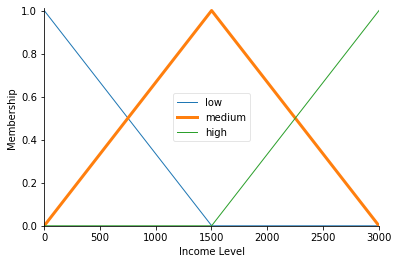

In [87]:
Income_Level['medium'].view()

C:\Users\Bharani\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


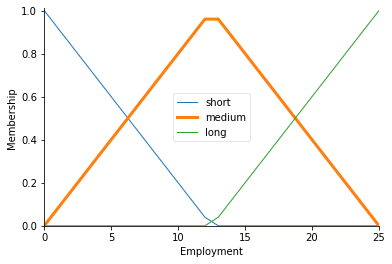

In [88]:
Employment['medium'].view()

C:\Users\Bharani\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


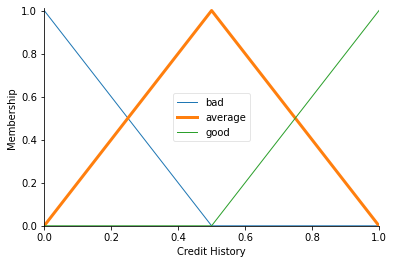

In [89]:
Credit_History['average'].view()

In [90]:
#Rules
rule1 = ctrl.Rule(Credit_History['bad'] , Credit_Standing['low'])
rule2 = ctrl.Rule(Credit_History['good'] , Credit_Standing['high'])
rule3 = ctrl.Rule(Credit_History['average'] , Credit_Standing['medium'])
rule4 = ctrl.Rule(Credit_History['bad'] & Employment['short'] & Income_Level['low'], Credit_Standing['low'])
rule5 = ctrl.Rule(Credit_History['good'] & Employment['long'] & Income_Level['medium'], Credit_Standing['medium'])
rule6 = ctrl.Rule(Credit_History['good'] & Employment['long'] & Income_Level['high'], Credit_Standing['high'])

In [91]:
CredStanding_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
CredStanding = ctrl.ControlSystemSimulation(CredStanding_ctrl)

In [92]:
# Inputs

CredStanding.input['Income Level'] = 200
CredStanding.input['Employment'] = 5
CredStanding.input['Credit History'] = 0.2


0.41219512195121955


C:\Users\Bharani\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


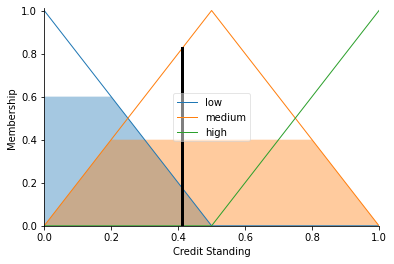

In [93]:
# Output

CredStanding.compute()
print(CredStanding.output['Credit Standing'])
Credit_Standing.view(sim=CredStanding)

# By using fuzzy logic as per the requirement and following inputs"Income Level=2000, Employment= 5 and Credit History = 0.2" for which I got a credit sanding value of = 0.412